In [7]:
# standard library dependencies
import os

# external dependencies
import pandas as pd
import numpy as np
import seaborn as sns

# local dependencies
from load_all_datasets import compile_datasets

In [11]:
patients_dfs = list(compile_datasets("data").values())


cleaned_01-2018.txt: (6493, 26)

cleaned_01-2019.txt: (9707, 26)

cleaned_02-2018.txt: (6733, 26)

cleaned_02-2019.txt: (9923, 26)

cleaned_03-2018.txt: (7015, 26)

cleaned_04-2018.txt: (7328, 26)

cleaned_05-2018.txt: (7678, 26)

cleaned_06-2018.txt: (7944, 26)

cleaned_07-2018.txt: (8209, 26)

cleaned_08-2018.txt: (8443, 26)

cleaned_09-2018.txt: (8652, 26)

cleaned_10-2018.txt: (8940, 26)

cleaned_11-2018.txt: (9218, 26)

cleaned_12-2018.txt: (9440, 26)

cleaned_2019-03.txt: (10171, 26)

cleaned_2019-04.txt: (10518, 26)

cleaned_2019-05.txt: (10829, 26)

cleaned_2019-06.txt: (11124, 26)

cleaned_2019-07.txt: (11388, 26)

cleaned_2019-08.txt: (11668, 26)

cleaned_2019-09.txt: (11986, 26)

finished compiling 21 datasets


In [12]:
# Cleaning the data sets: 

def correct_shift(x):
    a = x["Last On Drug Day"] 
    b = x["On Drug Start Day"]
    var = a-b if a != 0 else b
    return var

# 1. Removing patients with On Drug Start Day, Last On Drug Day = 0 (i.e never were in program at all...)
for index, df in enumerate(patients_dfs):
    df["Enrollment Time"] = df["Day Enrollment Completed"] - df["Day Enrollment Received"]
    df["On Drug Time"] = df[["Last On Drug Day", "On Drug Start Day"]].apply(correct_shift, axis=1)
    df["# of Payment Methods"] = df[["Payment Method #4", "Payment Method #5", "Payment Method #1", "Payment Method #3", "Payment Method #2"]].sum(axis=1)
    
    df = df.drop(columns = ["Day Enrollment Completed", "Day Enrollment Received", "Last On Drug Day", "On Drug Start Day",
                           "Payment Method #4", "Payment Method #5", "Payment Method #1", "Payment Method #3", "Payment Method #2"])
    
    patients_dfs[index] = df


In [13]:
#stats.chi2_contingency((pd.crosstab(df["Dosage"], df["Gender ID"])).values)

In [14]:
# 2. Data Exploration, Correlation, Chi-Squared
from scipy import stats
base_df = patients_dfs[len(patients_dfs)-1]
feat_num = base_df.shape[1]
features = base_df.columns
pvals = np.zeros((feat_num,feat_num))

for i, feature_i in enumerate(features):
    for j, feature_j in enumerate(features):
        chi2, p, dof, expec = stats.chi2_contingency((pd.crosstab(base_df[feature_i],base_df[feature_j])))
        pvals[i][j] = p

In [15]:
dof

4

In [16]:
pvals_df = pd.DataFrame(pvals, columns=features)
pvals_df.index = features

C:\Users\Samy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


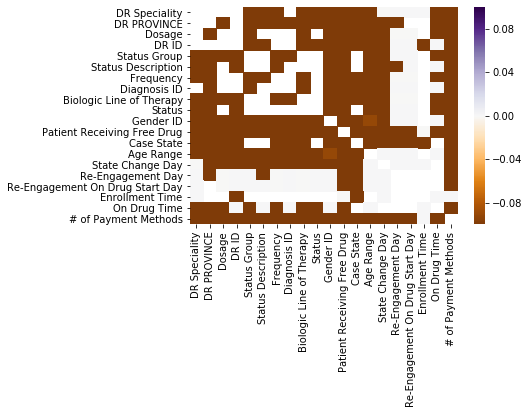

In [18]:
sns.heatmap(np.log10(pvals_df), cmap='PuOr')